In [4]:
from google.colab import files
uploaded = files.upload()

Saving dati.xlsx to dati.xlsx


In [5]:
!ls

dati.xlsx  drive  sample_data


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_excel('dati.xlsx')

In [5]:
data.head()

,var1,var2,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var27,var28,var29,var30,var31,var32,var33,var34,var35,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,...,var108,var109,var110,var111,var112,var113,var114,var115,var116,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var141,var142,var143,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158,costi
0,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,2794279,2677799,2833077,14562964,14352577,8073273,0,0,0,0,0,73273,9312470,7915379,7272270,35436524,37191289,32749686,32719851,34723462,30111298,84978,318158,318158,0,0,0,7834908,2178851,18788146,290899,188430,...,13310780,13264428,12114005,14296757,13558421,13421133,-823170,-507756,-530593,1228034,977093,1122097,783131,572136,267603,1588604,1604455,1856974,36310,-66672,135970,0,0,0,1870101,3257494,4594656,-3027241,1534078,3813249,229,214,207,84978,318158,318158,25290616,24108358,24535319,144205134
1,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,13368527,12404318,11085331,1850794,1693511,1060485,364872,1287356,811956,1485922,406155,248529,34529004,35683884,35340902,23391321,22915530,18886264,10795833,11017483,11177585,1583,1583,1588,355977,43180,471450,5293624,2889766,1616895,408806,551290,...,16889643,15833127,15986500,2713441,2434423,2180861,3207072,1304536,-3015558,912728,1042592,1058524,80006,47390,35171,769967,895916,1201286,11943,82820,1553908,0,0,0,1373420,1220932,1304576,1924469,2124721,2204557,454,411,456,1583,1583,1588,14133394,10404117,12898505,140165127
2,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,23900000,25404000,26269000,69000,66000,56000,0,0,0,0,0,0,17498000,12270000,12954000,31359000,47731000,43044000,26022000,43298000,39653000,1801000,1761000,1171000,3000,3000,0,19082000,4224000,5958000,1596000,7000,...,9901000,10029000,9581000,3832000,3762000,3497000,-6933000,683000,2125000,2624000,2743000,1937000,53000,59000,59000,915000,1122000,1153000,-1000,3000,-10000,0,0,-36000,9000,1166000,1450000,-803000,3170000,2408000,116,165,168,1801000,1761000,1171000,31861000,22494000,24687000,145190000
3,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,4183889,4354175,4510666,25917,25917,25917,25917,25917,25917,0,0,0,25923161,17921979,19627665,21948953,22868722,23881755,15584991,15576621,23831452,890646,0,0,0,2226616,0,185206,54173,1151195,643650,567191,...,3075383,3296773,3290801,631775,638706,725484,-1868447,-306450,3770484,421274,885471,377168,217482,149383,155720,428722,439358,525316,34150,95776,-114667,0,0,0,80381,185005,258220,478455,494325,473999,60,60,65,890646,0,0,1000000,0,1188439,112760368
4,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,20251827,20965972,20661743,2324116,2070401,179562,1754388,1625505,178366,0,1196,1196,18950865,16878270,18797216,8362491,16303624,14624193,4425910,11432236,11013435,0,0,0,0,0,0,14381920,10465984,10529721,1463431,707312,...,6335628,5294076,4974163,5310610,4361914,3345706,-2235901,3075212,-2049351,1676826,1524379,2270501,31436,12726,60454,781590,787832,1051073,-481,-95,-697,0,0,0,472994,795056,943092,966348,1243727,869544,171,141,132,0,0,0,27325115,24037285,24492237,171980718


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479 entries, 0 to 7478
Columns: 135 entries, var1 to costi
dtypes: int64(135)
memory usage: 7.7 MB


In [0]:
X = data.iloc[:,0:-1]

y = data['costi']

In [0]:
X.shape

(7479, 134)

In [0]:
y.shape

(7479,)

In [0]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5235, 134) (2244, 134) (5235,) (2244,)


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
model.intercept_

-3200.777457194403

In [0]:
model.coef_

array([-2.30996462e-03, -1.50058663e-02, -2.81813068e-02,  1.84983370e-01,
       -1.07535485e-01, -1.25291295e-02,  1.39249816e-01, -9.91288975e-02,
        4.14284936e-03, -4.74053837e-03, -4.09265041e-04, -1.07988920e-02,
        5.53436241e-02, -4.89814741e-02, -2.08352209e-02,  7.25301721e-02,
       -3.77319133e-02,  8.76194678e-02, -7.65657544e-02,  1.17948143e-01,
       -9.30513956e-01,  1.08357037e+00, -1.26653220e-01,  4.79202414e-03,
        1.43007817e-01, -1.15888295e-01,  9.94973398e-03,  2.70744978e-04,
       -7.92966224e-03,  2.69702385e-02, -4.17703102e-02,  1.29981403e-02,
       -2.03380493e-02,  1.65893118e-01, -1.27604963e-01, -2.66074722e-02,
        1.79488728e-01, -1.18126746e-01, -4.34200642e-02,  1.21637354e-02,
       -1.04109145e-02,  5.60581055e-03, -6.01850048e-02,  4.47773476e-02,
        2.20944502e-02, -1.13635756e-01,  7.64066351e-02,  1.19314776e-04,
        9.93569282e-03, -1.59561082e-02, -7.39703203e-02, -1.36109362e-01,
        1.99741967e-01,  

In [0]:
y_predict = model.predict(X_test)

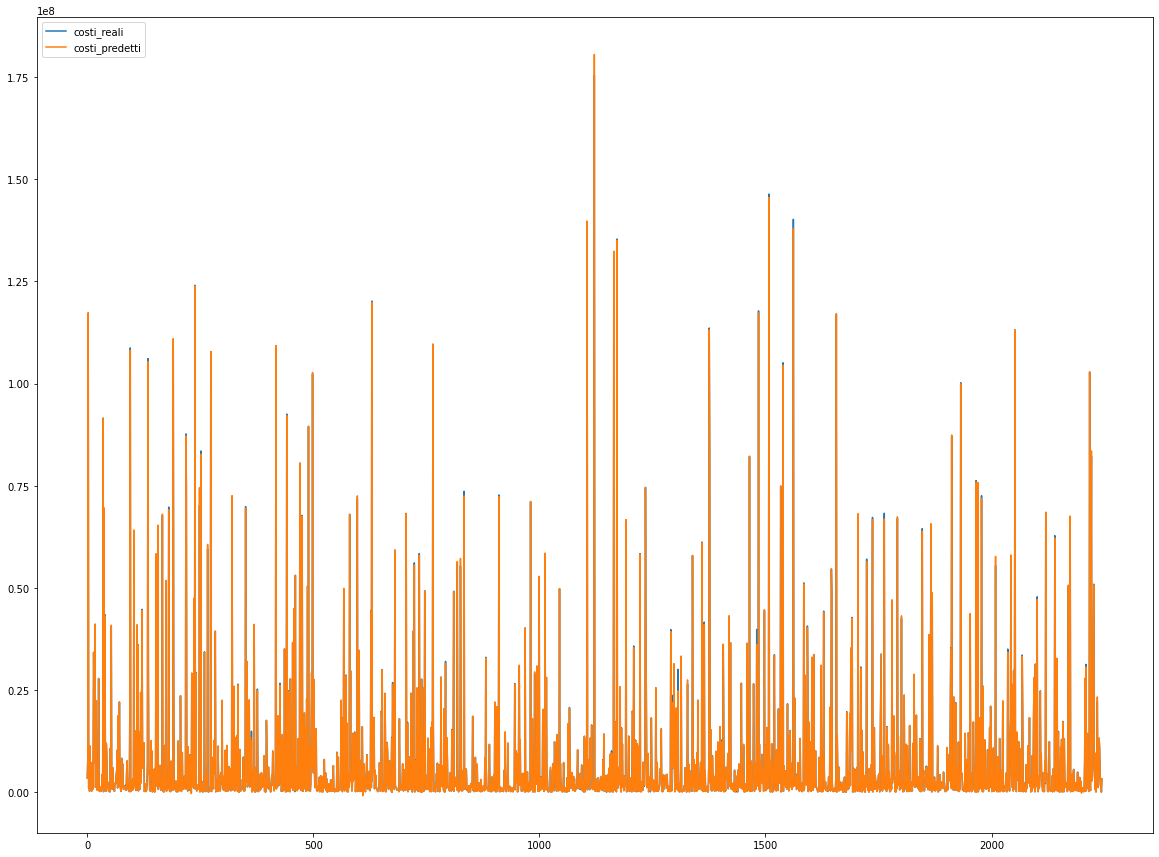

In [0]:
length = y_predict.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='costi_reali')
plt.plot(x, y_predict, label='costi_predetti')
plt.legend(loc=2);

## Export coeff of regressor

In [0]:
coeff = model.coef_
coeff

### EXPORT THE COEFF OF REGRESSOR
formula_excel =pd.DataFrame(coeff, columns=['coeff'])
formula_excel.to_excel('formula.xlsx', index=False)

## Export Prediction in a final column

In [0]:
data['costi_PRED']=model.predict(data.iloc[:,0:-1])
data[['costi', 'costi_PRED']].head()

,costi,costi_PRED
0,144205134,1.443731e+08
1,140165127,1.379588e+08
2,145190000,1.444782e+08
3,112760368,1.130755e+08
4,171980718,1.734026e+08


In [0]:
#save the data
data.to_excel('result1.xlsx', index=False)

##Export model

In [0]:
import pickle
pickle.dump( model, open( 'model.p', 'wb' ) )
# modello di regressione lineare con tutte le 134 Xi

## Import the model (pickle) with new data

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
#Loading a new dataset
import pandas as pd 
import numpy as np

df = pd.read_excel('test.xlsx')

X = df.iloc[:,0:-1]
y = df['costi']

In [0]:
X.shape

(100, 134)

In [0]:
#Load the pickled object. 
model = pickle.load( open( "model.p", "rb" ) )

In [0]:
y_predict = model.predict(X)

In [0]:
df['costi_PRED'] = model.predict(X)
df[['costi', 'costi_PRED']].head()

,costi,costi_PRED
0,2508929000,2.522365e+09
1,2173873000,2.171454e+09
2,1526367000,1.572747e+09
3,1174142000,1.166190e+09
4,0,-4.325780e+07


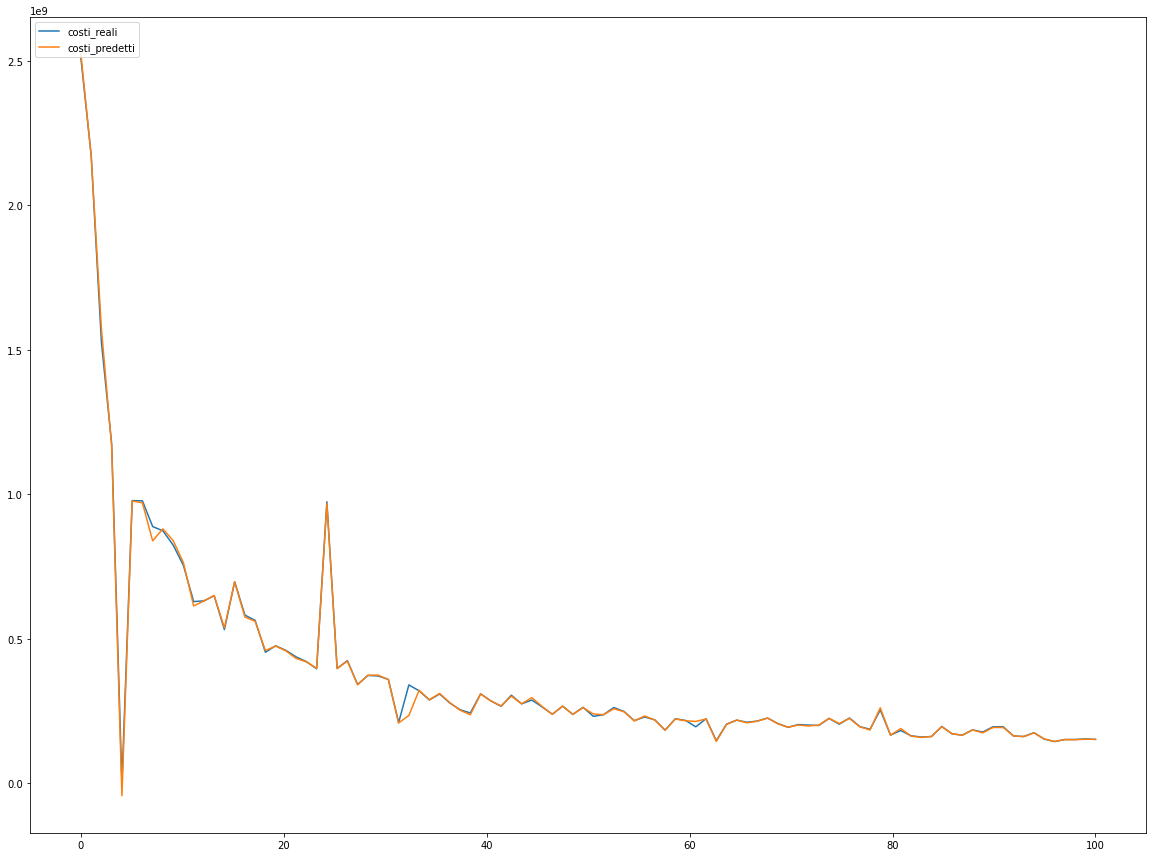

In [0]:
length = y.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y, label='costi_reali')
plt.plot(x, y_predict, label='costi_predetti')
plt.legend(loc=2);

In [0]:
#save the data
df.to_excel('result_new_dataset.xlsx', index=False)

## Reduce number of regressor 8 regressors

In [0]:
data2 = data.copy()
del data2['costi_PRED']

In [0]:
corrmat = data2.corr()
corrmat

,var1,var2,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var27,var28,var29,var30,var31,var32,var33,var34,var35,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,...,var108,var109,var110,var111,var112,var113,var114,var115,var116,var123,var124,var125,var126,var127,var128,var129,var130,var131,var132,var133,var134,var135,var136,var137,var141,var142,var143,var147,var148,var149,var150,var151,var152,var153,var154,var155,var156,var157,var158,costi
var1,1.000000,0.986345,0.135692,0.130403,0.235256,0.652578,0.639252,0.625818,0.522128,0.517458,0.624950,0.415115,0.386054,0.369241,0.381076,0.351668,0.337167,0.187145,0.182562,0.213661,0.643967,0.652575,0.653724,0.885616,0.901770,0.889494,0.849578,0.871460,0.873803,0.206912,0.217005,0.260878,0.152898,0.170960,0.167835,0.561514,0.529838,0.551337,0.342868,0.313105,...,0.738153,0.747532,0.763650,0.557382,0.591085,0.674079,-0.081304,-0.108396,-0.161343,0.458148,0.441197,0.424094,0.188005,0.141545,0.265174,0.387952,0.532638,0.535435,-0.033266,-0.075452,0.034593,-0.030284,-0.157753,-0.136756,0.503319,0.566754,0.620623,0.374695,0.314028,0.392427,0.639018,0.626608,0.642236,0.188735,0.188945,0.223395,0.456726,0.488830,0.537188,0.986153
var2,0.986345,1.000000,0.183263,0.193421,0.267485,0.656802,0.644170,0.635073,0.529413,0.525425,0.638663,0.416329,0.389934,0.370164,0.378868,0.351583,0.336201,0.188228,0.182147,0.214706,0.637955,0.648195,0.653929,0.883733,0.895384,0.894533,0.852143,0.868651,0.883315,0.217426,0.220016,0.264968,0.152903,0.168143,0.169033,0.553340,0.528199,0.553966,0.330029,0.305480,...,0.726053,0.733222,0.767513,0.594631,0.603129,0.712480,-0.078030,-0.105031,-0.157499,0.464254,0.447246,0.434021,0.186468,0.152456,0.271204,0.413598,0.548888,0.565061,-0.065981,-0.084900,0.030522,-0.042834,-0.174988,-0.136803,0.465343,0.548087,0.623318,0.341054,0.290481,0.381861,0.630293,0.620489,0.642667,0.198160,0.191570,0.226940,0.476820,0.518401,0.542348,0.976198
var6,0.135692,0.183263,1.000000,0.873993,0.813696,0.189718,0.182933,0.165854,0.131329,0.127274,0.139800,0.335777,0.130861,0.101365,0.259090,0.096747,0.087498,0.003349,0.003959,0.006180,0.113859,0.109382,0.099655,0.148542,0.155342,0.128628,0.128418,0.143798,0.123677,0.097007,0.055760,0.051068,0.005120,0.005173,0.008444,0.089825,0.176643,0.165656,0.055283,0.023465,...,0.184832,0.138871,0.182232,0.674075,0.334837,0.517908,0.001620,-0.048689,-0.013749,0.107458,0.085651,0.087308,0.059003,0.078457,0.122742,0.622851,0.224365,0.521631,-0.216426,0.005878,-0.069827,-0.004018,0.025614,-0.184567,-0.090820,0.202786,0.202446,-0.125143,0.031223,0.106843,0.145932,0.139871,0.135043,0.087843,0.048679,0.043582,0.752713,0.479469,0.243378,0.176026
var7,0.130403,0.193421,0.873993,1.000000,0.725537,0.226065,0.216583,0.194307,0.151139,0.145181,0.156576,0.219797,0.143006,0.104691,0.167873,0.099393,0.089165,0.002658,0.002687,0.006144,0.125486,0.113749,0.104222,0.166999,0.175232,0.145167,0.156505,0.176031,0.147110,0.129380,0.052250,0.051619,0.007890,0.007631,0.012758,0.103887,0.144036,0.178280,0.040511,0.028061,...,0.189389,0.127823,0.182980,0.748622,0.354451,0.591595,-0.006842,-0.050565,-0.008803,0.114722,0.079594,0.102993,0.053131,0.101960,0.150623,0.498843,0.280969,0.427650,-0.335108,0.048683,-0.111728,-0.003179,0.028650,-0.200492,-0.115681,0.134505,0.202609,-0.158951,-0.029327,0.084978,0.151873,0.147328,0.136093,0.117306,0.045500,0.044010,0.652591,0.635520,0.317137,0.184230
var8,0.235256,0.267485,0.813696,0.725537,1.000000,0.265146,0.266050,0.246782,0.206811,0.205262,0.207759,0.363357,0.211711,0.196459,0.298309,0.178568,0.184040,0.006438,0.006876,0.014061,0.157938,0.157350,0.144310,0.222544,0.228397,0.213953,0.195191,0.206778,0.197445,0.078609,0.065872,0.071788,0.020384,0.019720,0.025038,0.147141,0.210100,0.266617,0.084317,0.061866,...,0.247220,0.235928,0.261570,0.617437,0.510830,0.597908,-0.008968,-0.097494,-0.007816,0.167191,0.169458,0.136359,0.073326,0.214011,0.352343,0.600951,0.449527,0.64273

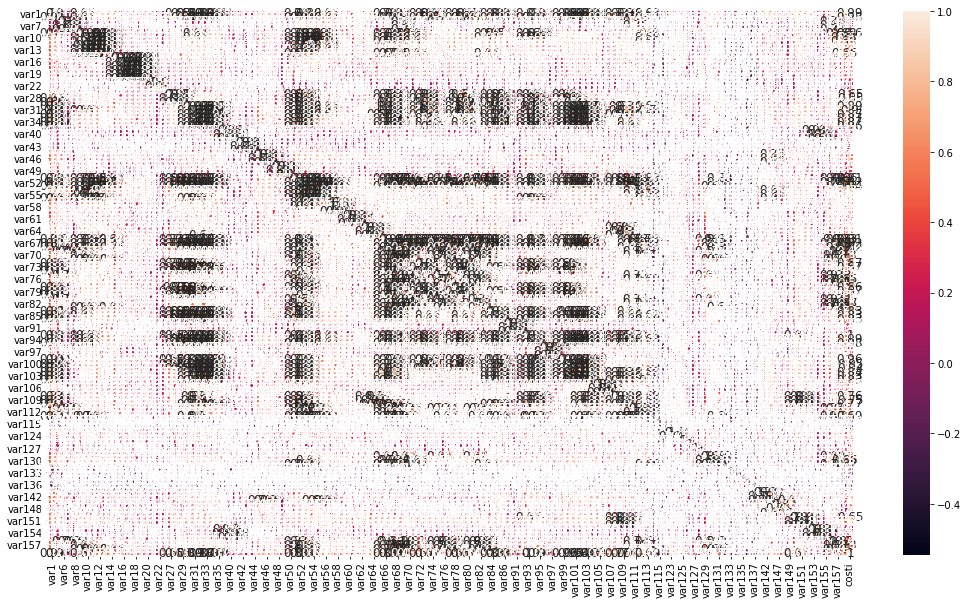

In [0]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [0]:
corrmat.index.values

array(['var1', 'var2', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11',
       'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18',
       'var19', 'var20', 'var21', 'var22', 'var23', 'var27', 'var28',
       'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35',
       'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45',
       'var46', 'var47', 'var48', 'var49', 'var50', 'var51', 'var52',
       'var53', 'var54', 'var55', 'var56', 'var57', 'var58', 'var59',
       'var60', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66',
       'var67', 'var68', 'var69', 'var70', 'var71', 'var72', 'var73',
       'var74', 'var75', 'var76', 'var77', 'var78', 'var79', 'var80',
       'var81', 'var82', 'var83', 'var84', 'var85', 'var86', 'var90',
       'var91', 'var92', 'var93', 'var94', 'var95', 'var96', 'var97',
       'var98', 'var99', 'var100', 'var101', 'var102', 'var103', 'var104',
       'var105', 'var106', 'var107', 'var108', 'var109', 'var110',
       'var111'

In [0]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [0]:
threshold = 0.90
corr_value = getCorrelatedFeature(corrmat['costi'], threshold)
corr_value

,Corr Value
var1,0.986153
var2,0.976198
var93,0.998334
var94,0.985817
var95,0.975280
var99,0.959306
var100,0.946764
var101,0.936186
costi,1.000000


In [0]:
corr_value.index.values

array(['var1', 'var2', 'var93', 'var94', 'var95', 'var99', 'var100',
       'var101', 'costi'], dtype=object)

In [0]:
correlated_data = data2[corr_value.index]
correlated_data.head()

,var1,var2,var93,var94,var95,var99,var100,var101,costi
0,147823139,148193655,145914503,148992105,149021406,85824629,86758885,83651116,144205134
1,147562322,163251010,142727898,150222876,166417107,102237238,113037130,131392006,140165127
2,147562000,142652000,148757000,153783000,148906000,117422000,111227000,108035000,145190000
3,147067625,140160124,119349203,145528364,143260149,105779603,129982682,121831610,112760368
4,145273739,127413305,174796438,148011089,130682792,149110551,119058121,106955719,171980718


In [0]:
correlated_data.shape

(7479, 9)

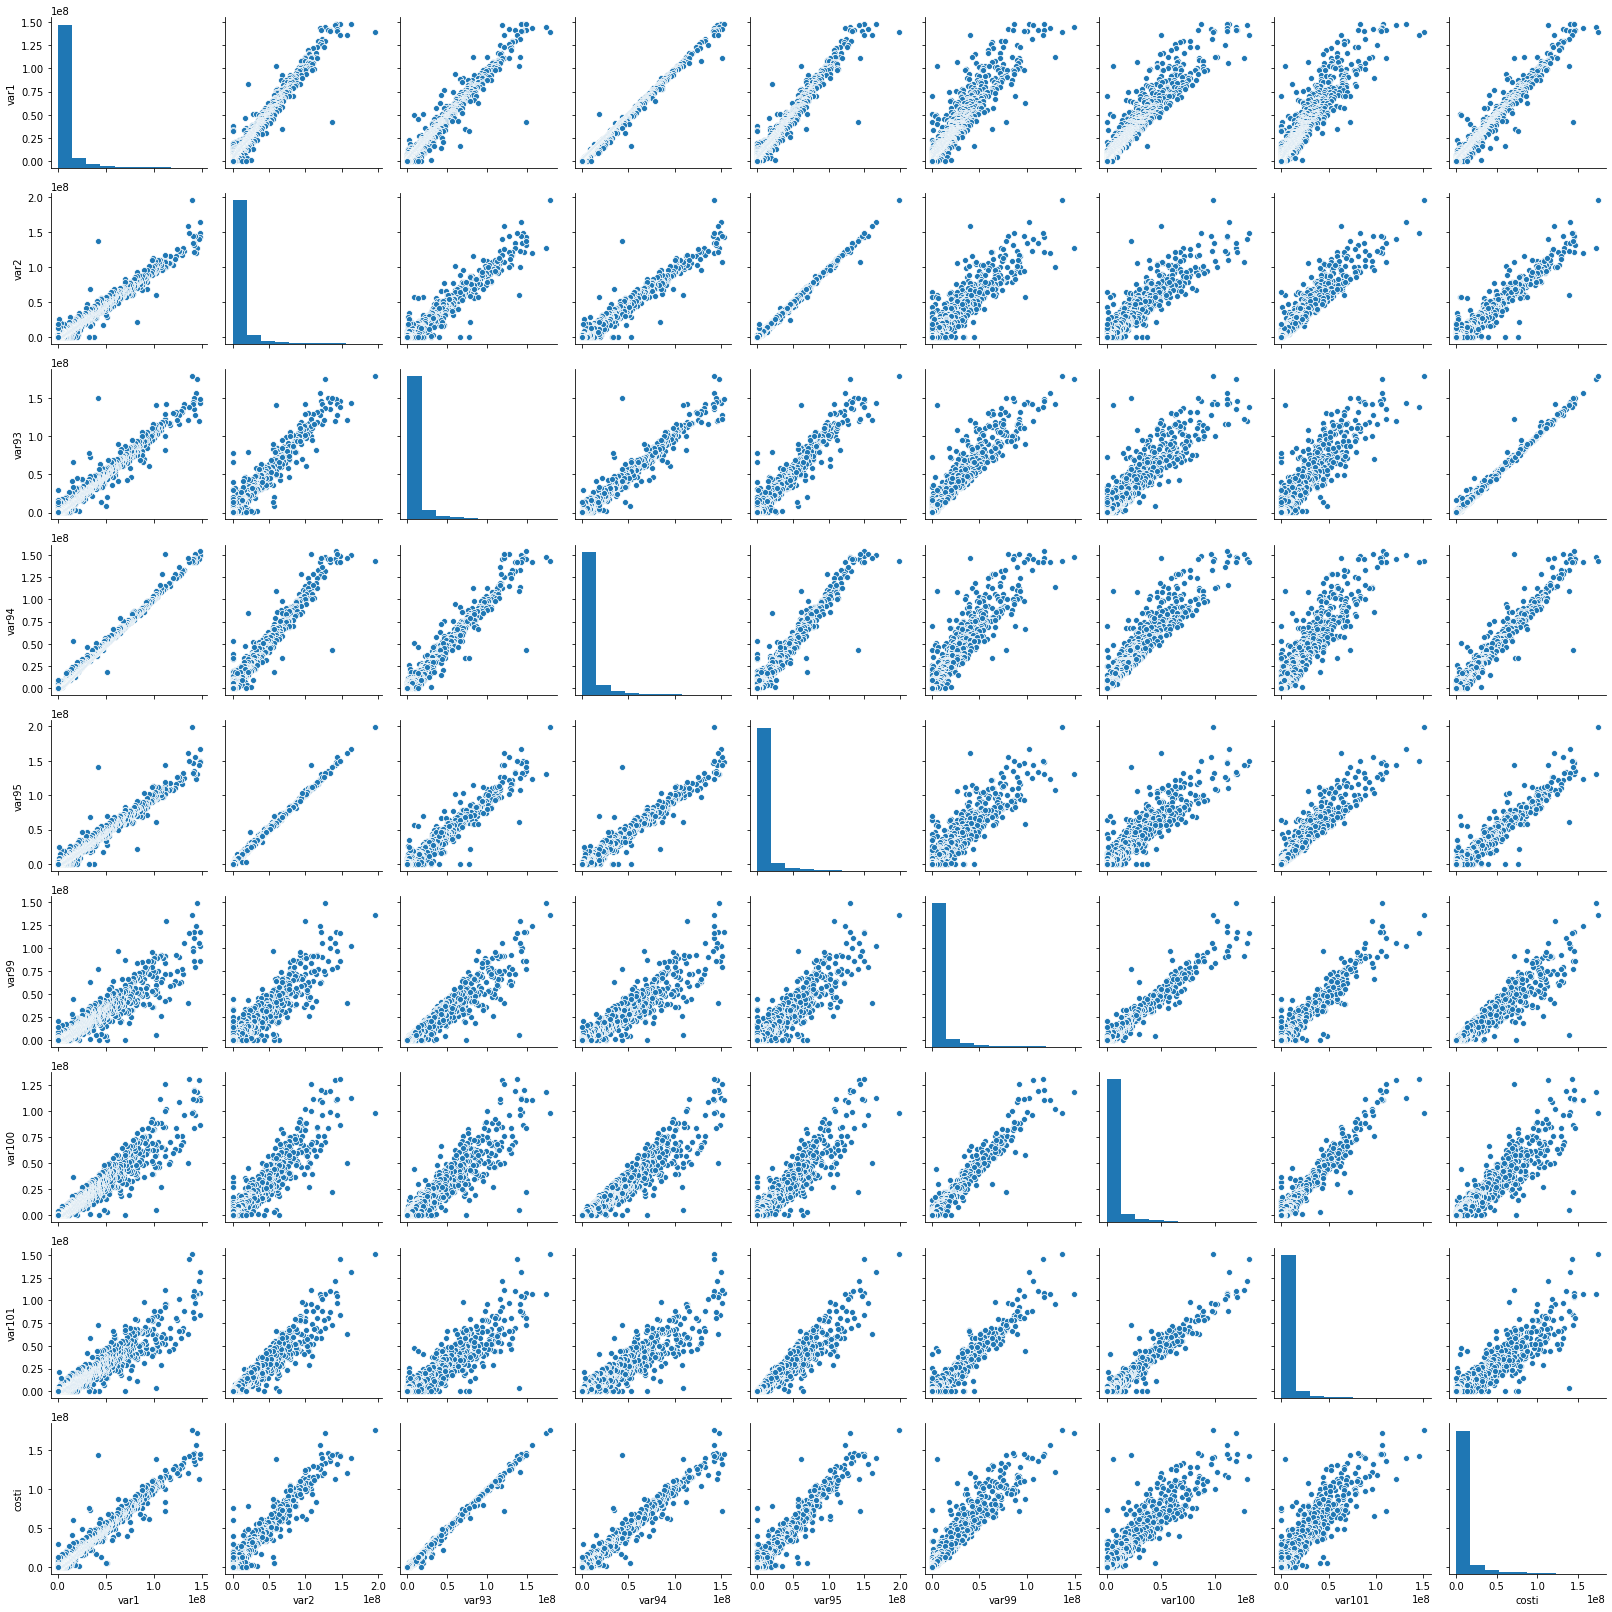

In [0]:
sns.pairplot(correlated_data)
plt.tight_layout()

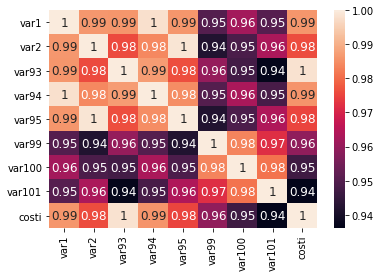

In [0]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12});

In [0]:
X = correlated_data.drop(labels=['costi'], axis = 1)
y = correlated_data['costi']
X.head()

,var1,var2,var93,var94,var95,var99,var100,var101
0,147823139,148193655,145914503,148992105,149021406,85824629,86758885,83651116
1,147562322,163251010,142727898,150222876,166417107,102237238,113037130,131392006
2,147562000,142652000,148757000,153783000,148906000,117422000,111227000,108035000
3,147067625,140160124,119349203,145528364,143260149,105779603,129982682,121831610
4,145273739,127413305,174796438,148011089,130682792,149110551,119058121,106955719


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train.shape, X_test.shape

((5983, 8), (1496, 8))

In [0]:
model = LinearRegression(normalize=True,fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
y_predict = model.predict(X_test)

In [0]:
df = pd.DataFrame(data = [y_predict, y_test])
df = df.T
df.columns = ['costi', 'costi_PRED']
df

,costi,costi_PRED
0,3.664867e+06,3534300.0
1,7.809564e+06,7874798.0
2,1.152198e+08,115850068.0
3,1.010573e+06,1048631.0
4,3.258395e+06,3348815.0
...,...,...
1491,9.072874e+06,9303572.0
1492,2.374781e+06,2310607.0
1493,5.624134e+06,5696533.0
1494,5.119308e+06,5233938.0


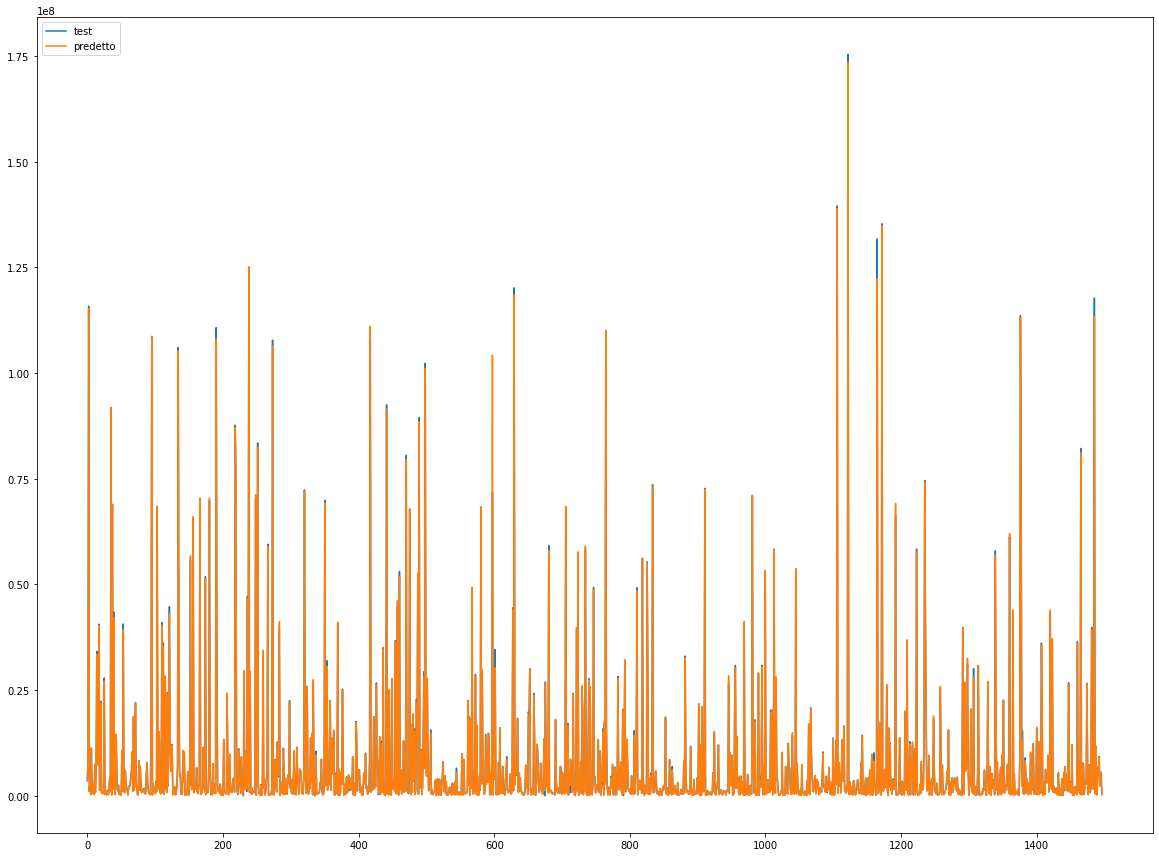

In [0]:
length = y_predict.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_predict, label='predetto')
plt.legend(loc=2);

In [0]:
model.intercept_

-27689.42884542793

In [0]:
coeff = model.coef_
coeff

array([ 0.10767113,  0.3805769 ,  0.93862885, -0.09831021, -0.34587131,
        0.00826232,  0.04751049, -0.04413217])

In [0]:
label = np.asarray(correlated_data.columns)
label

array(['var1', 'var2', 'var93', 'var94', 'var95', 'var99', 'var100',
       'var101', 'costi'], dtype=object)

In [0]:
export = pd.DataFrame({
    'coeff':[0.10767113,  0.3805769 ,  0.93862885, -0.09831021, -0.34587131,0.00826232,  0.04751049, -0.04413217],
    'label':['var1', 'var2', 'var93', 'var94', 'var95', 'var99', 'var100','var101'] })
export[['coeff','label']]

,coeff,label
0,0.107671,var1
1,0.380577,var2
2,0.938629,var93
3,-0.098310,var94
4,-0.345871,var95
5,0.008262,var99
6,0.047510,var100
7,-0.044132,var101


In [0]:
export.to_excel('ridotta.xlsx', index=False)

In [0]:
## testare la formua con l'excel di test